# Correlations Exploration

## Notable insights
##### feature vs status 
* Ascites and Y category of edema were strong predictors of D class 
* Sex / hepatomegaly / spiders / stage / age / bilirubin / albumin / copper in urine / SGOT/ platelets/ prothrombin influenced status.
##### feature vs feature
* Moderate negative correlation between N catagory of edema ascites (-0.53)
* Strong positive correlation between Y catagory of edema and ascites (0.66)
* Moderate positive correlation between stage and hepatomegaly (0.5)
* no significant non-linear relationships were found between features. 

## Importing packages and loading the data

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

## Looking for relationships between features and status

### Catagorical variables

In [66]:
# function used to create pivot table to draw stacked bar chart
def createPivotTable(data, variable): 
    # Group the data by 'Drug' and 'Status' and count the occurrences
    grouped = data.groupby([variable, 'Status']).size().reset_index(name='Count')
    total_patients_per_variable  = grouped.groupby(variable)['Count'].transform('sum')
    grouped['Proportion'] = grouped['Count'] / total_patients_per_variable
    pivot_df = grouped.pivot(index=variable, columns='Status', values='Proportion')
    return pivot_df

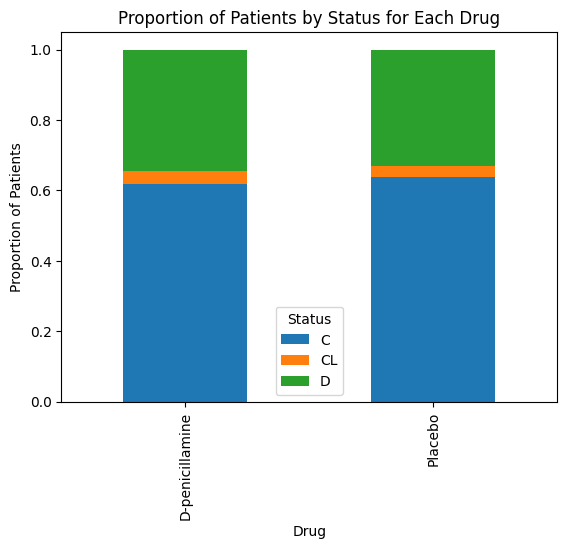

In [67]:
pivot_df = createPivotTable(df_train, 'Drug')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status for Each Drug')
plt.xlabel('Drug')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Drug did not have a signicant effect on status. D-penillamine did not have significant effect on the in proportion the of patients in each class

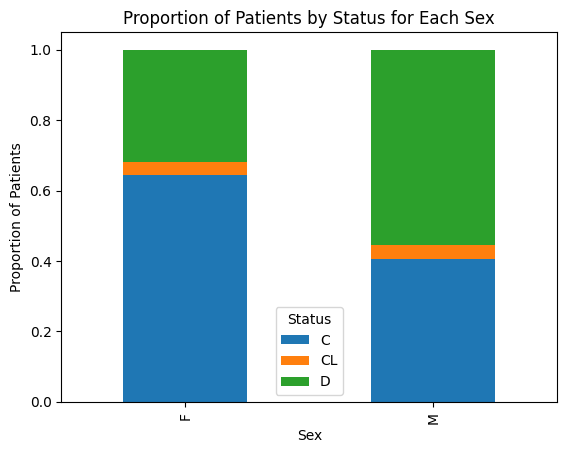

In [68]:
pivot_df = createPivotTable(df_train, 'Sex')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status for Each Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Sex had a signficnat effect on status. Men had a higher proportion of patients in D class and lower proportion of patients in C class

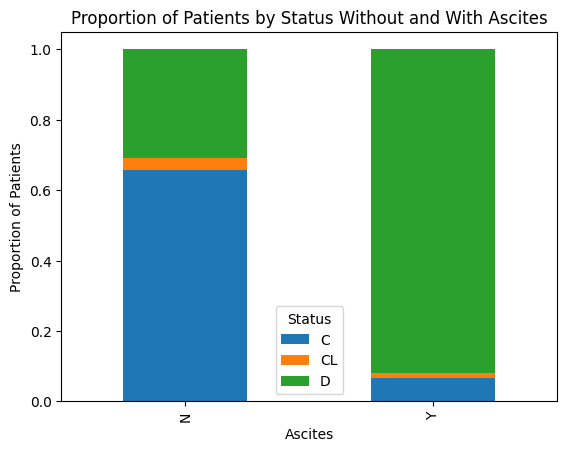

In [69]:
pivot_df = createPivotTable(df_train, 'Ascites')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Without and With Ascites')
plt.xlabel('Ascites')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

### Ascites had a signficnat effect on status. Patients with ascites had a significantly higher proportion in D class and lower proportion in C class.

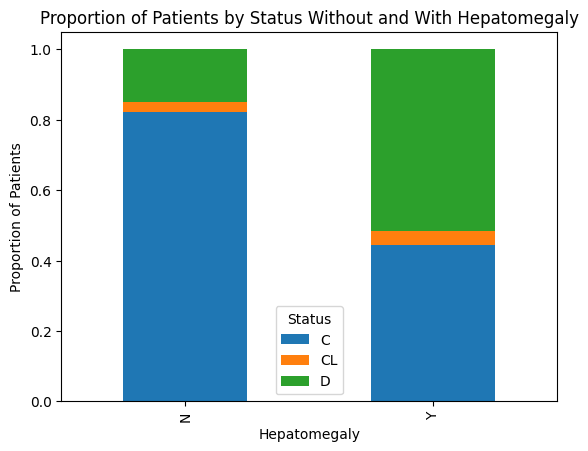

In [70]:
pivot_df = createPivotTable(df_train, 'Hepatomegaly')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Without and With Hepatomegaly')
plt.xlabel('Hepatomegaly')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Hepatomegaly had a signficant effect on status. Patients with hepatomegaly had a higher proportion in D class and lower in C class. 

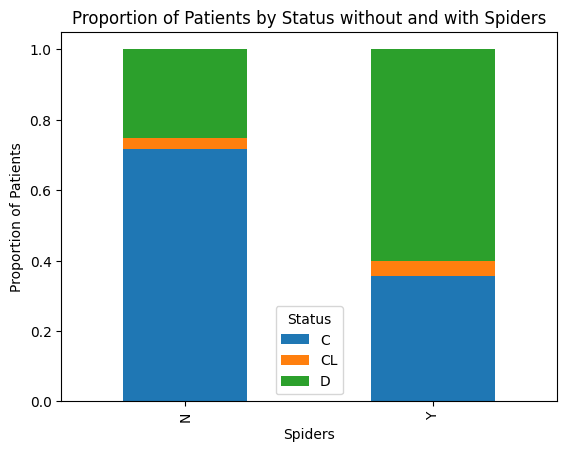

In [71]:
pivot_df = createPivotTable(df_train, 'Spiders')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status without and with Spiders')
plt.xlabel('Spiders')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Spiders had a signficant effect on status. Patients with spiders had a higher proportion in D class and lower in C class. 

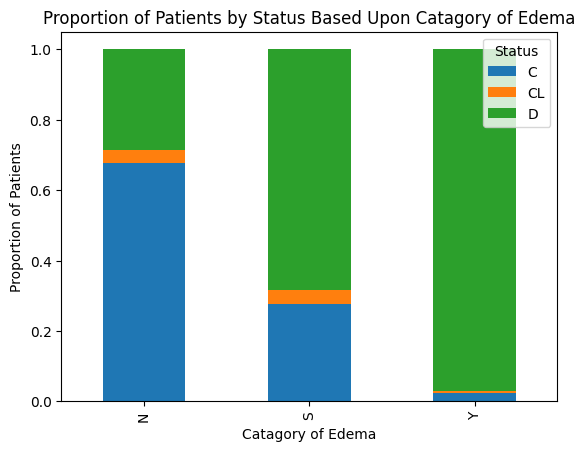

In [72]:
pivot_df = createPivotTable(df_train, 'Edema')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Based Upon Catagory of Edema')
plt.xlabel('Catagory of Edema')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

##### Edema catagory had a signficant effect on status. Patients in Y and S class for Edema had significantly higher proportion of patients in D class. Higher proportion in Y than S. 

##### Description of edema variable: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

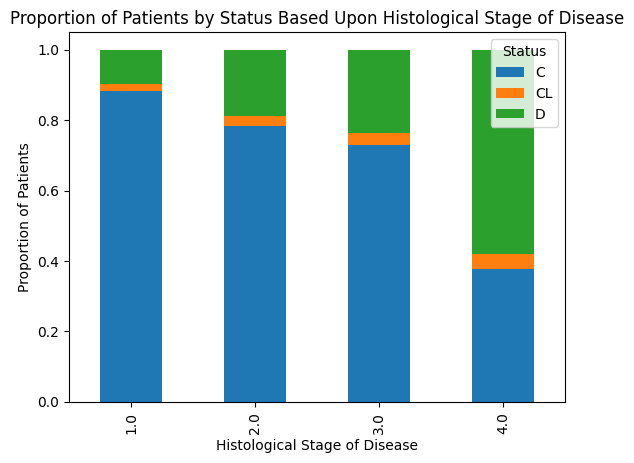

In [73]:
pivot_df = createPivotTable(df_train, 'Stage')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Based Upon Histological Stage of Disease')
plt.xlabel('Histological Stage of Disease')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Stage of disease had a signficant effect on status. Patients in stage 4 of disease had a significantly higher proportion in D class than 1,2,3. 2 and 3 were greater than 1. 2 and 3 were similar. 

### Continuous variables

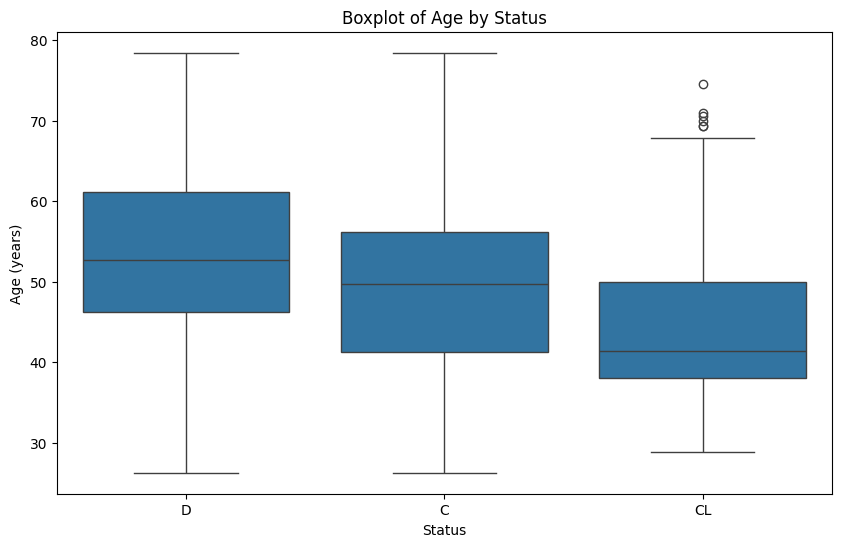

In [74]:
# Convert age from days to years for better readability
df_train['Age_years'] = df_train['Age'] / 365.25

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age_years', data=df_train)
plt.title('Boxplot of Age by Status')
plt.xlabel('Status')
plt.ylabel('Age (years)')
plt.show()

#### Age had an effect on status. Patients in CL class were associated with a lower age 

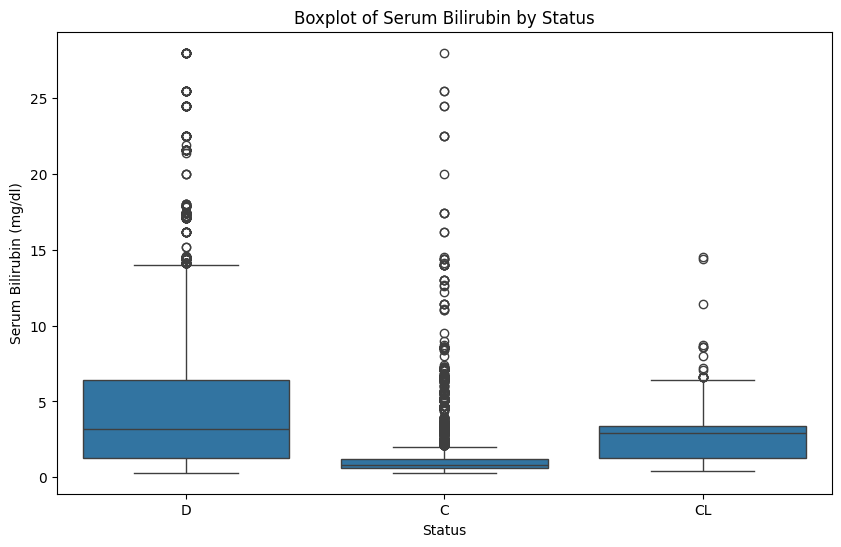

In [75]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Bilirubin', data=df_train)
plt.title('Boxplot of Serum Bilirubin by Status')
plt.xlabel('Status')
plt.ylabel('Serum Bilirubin (mg/dl)')
plt.show()

#### Bilirubin had an effect on status. Patients in C class had lower bilibrubin

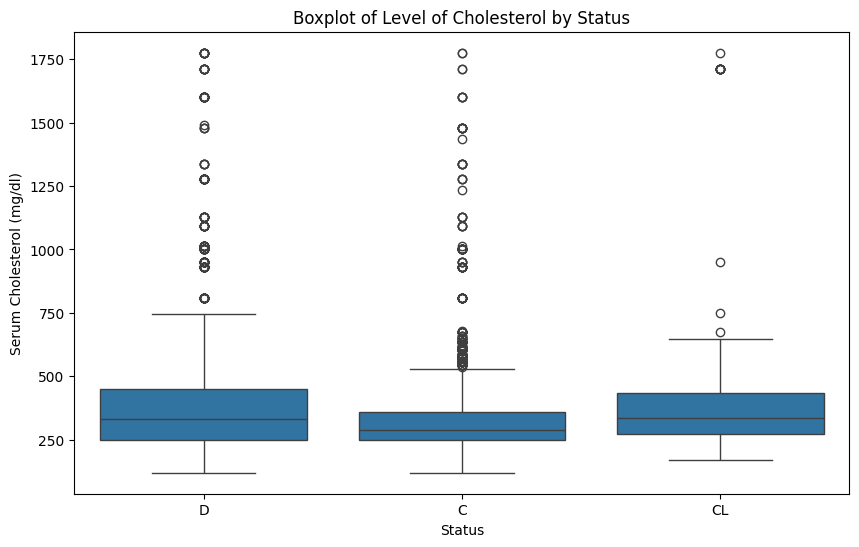

In [76]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Cholesterol', data=df_train)
plt.title('Boxplot of Level of Cholesterol by Status')
plt.xlabel('Status')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()

#### Cholesterol did not had an effect on status.

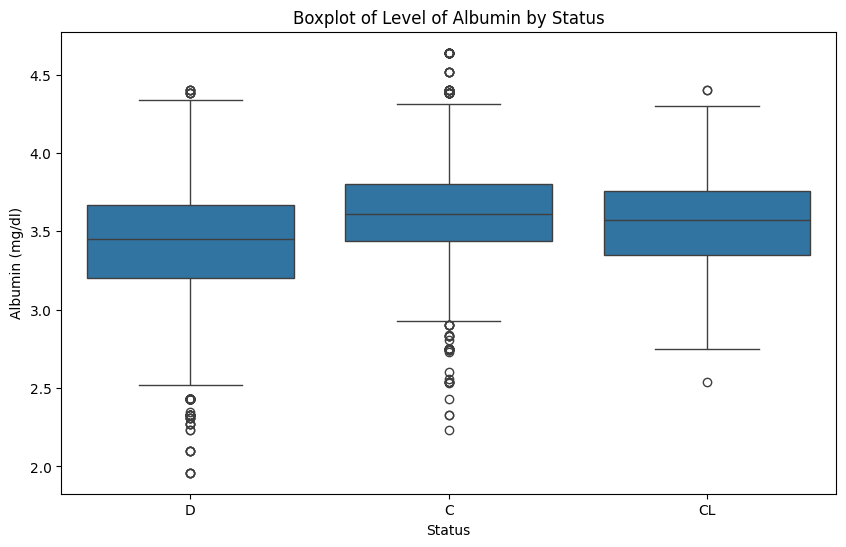

In [77]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Albumin', data=df_train)
plt.title('Boxplot of Level of Albumin by Status')
plt.xlabel('Status')
plt.ylabel('Albumin (mg/dl)')
plt.show()

#### Albumin had an effect on status. Patients in D class were associated with lower albumin

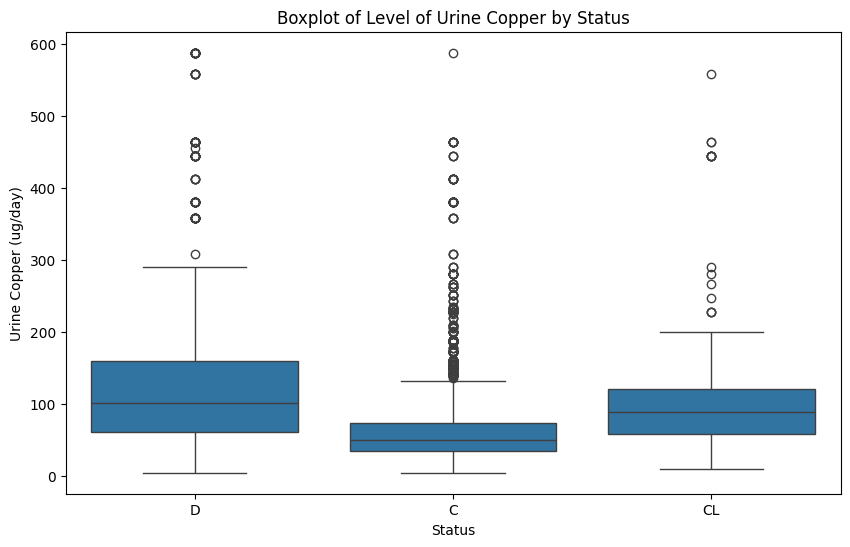

In [78]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Copper', data=df_train)
plt.title('Boxplot of Level of Urine Copper by Status')
plt.xlabel('Status')
plt.ylabel('Urine Copper (ug/day)')
plt.show()

#### Copper in urine had an effect on status. Patients in C class were associated with lower copper in urine

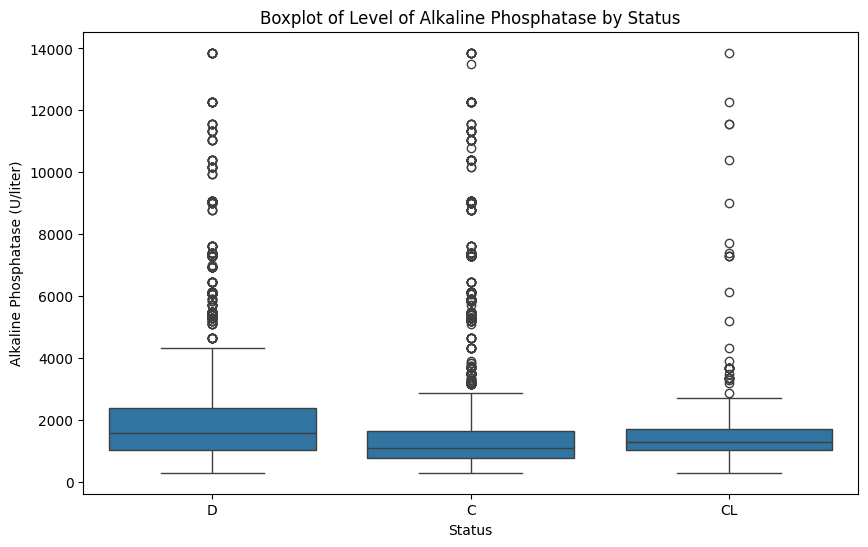

In [79]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Alk_Phos', data=df_train)
plt.title('Boxplot of Level of Alkaline Phosphatase by Status')
plt.xlabel('Status')
plt.ylabel('Alkaline Phosphatase (U/liter)')
plt.show()

#### Alkaline phosphotase did not have a significant effect on status.

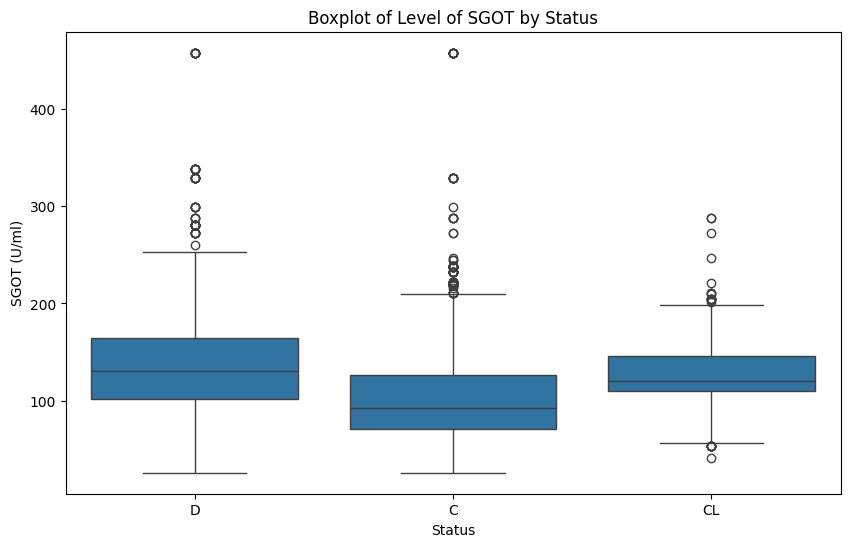

In [80]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='SGOT', data=df_train)
plt.title('Boxplot of Level of SGOT by Status')
plt.xlabel('Status')
plt.ylabel('SGOT (U/ml)')
plt.show()

#### SGOT had an effect on status. Patients in C class were associated with lower SGOT

#### SGOT - serum glutamic-oxaloacetic transaminase

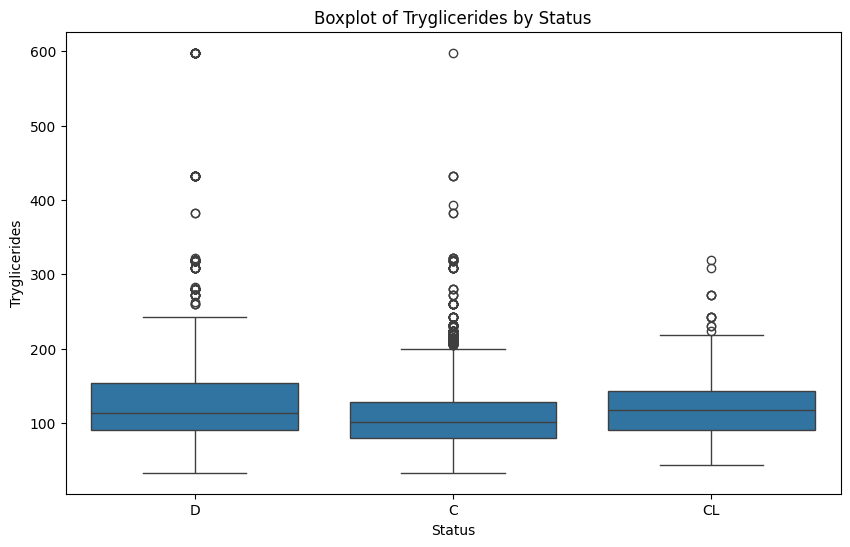

In [81]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Tryglicerides', data=df_train)
plt.title('Boxplot of Tryglicerides by Status')
plt.xlabel('Status')
plt.ylabel('Tryglicerides')
plt.show()

#### Triglicerides did not have a significant effect on status.

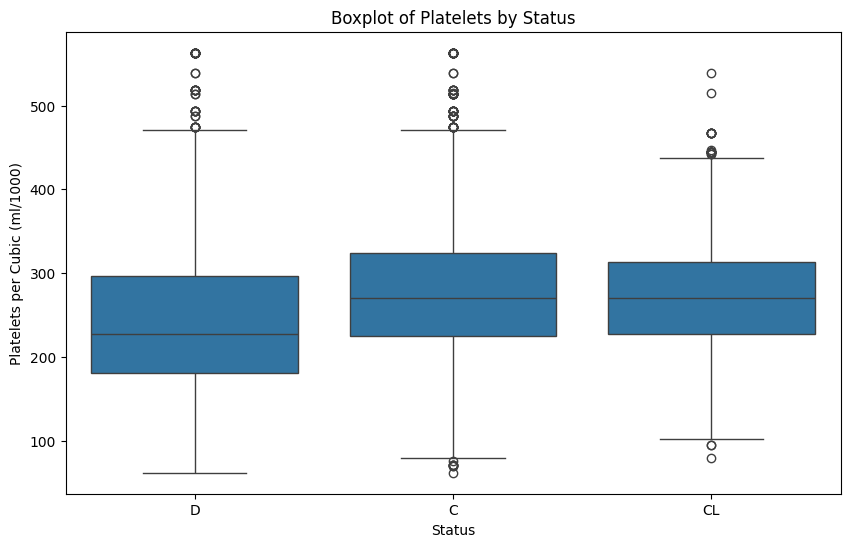

In [82]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Platelets', data=df_train)
plt.title('Boxplot of Platelets by Status')
plt.xlabel('Status')
plt.ylabel('Platelets per Cubic (ml/1000)')
plt.show()

#### Platelets had an effect on status. Patients in D class were associated with lower platelets

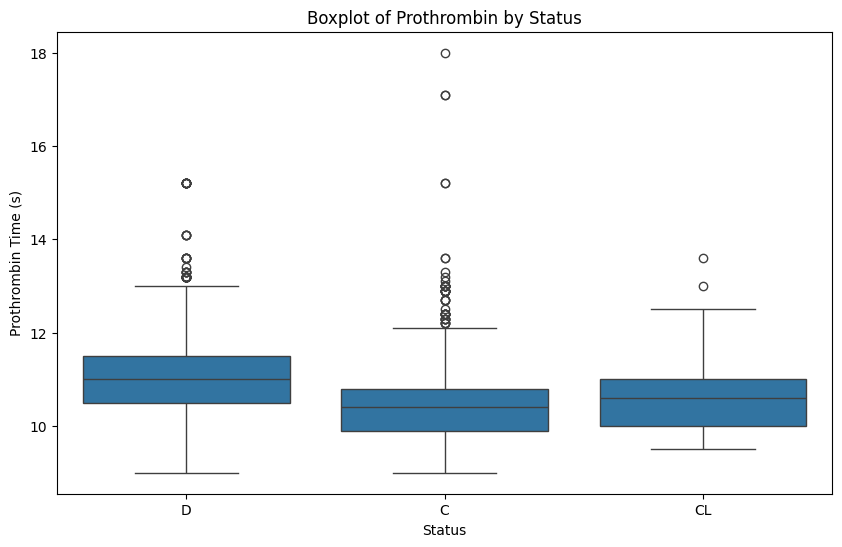

In [83]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Prothrombin', data=df_train)
plt.title('Boxplot of Prothrombin by Status')
plt.xlabel('Status')
plt.ylabel('Prothrombin Time (s)')
plt.show()

#### Prothrobin had an effect on status. Patients in D class were associated with higher prothrobin

## Looking for relationships between features and features

### Ordinal 
* Stage 

##### One hot encode catagorical 
* Sex                 
* Ascites             
* Hepatomegaly        
* Spiders             
* Edema                           
* Drug 

In [84]:
# Edema
data = {'Category': ['N', 'S', 'Y']}
df = df_train['Edema']
EdemaNumerical = pd.get_dummies(df, columns=['Category'])


In [85]:
df_train['SexNumerical'] = np.where(df_train['Sex']=='F', 1, 0)
df_train['AscitesNumerical'] = np.where(df_train['Ascites']=='N', 0, 1)
df_train['HepatomegalyNumerical'] = np.where(df_train['Hepatomegaly']=='N', 0, 1)
df_train['SpidersNumerical'] = np.where(df_train['Spiders']=='N', 0, 1)
#df_train['EdemaNumerical'] = np.where(df_train['Edema']=='N', 0, 1)
df_train['DrugNumerical'] = np.where(df_train['Drug']=='D-penicillamine', 1, 0)


In [86]:
df_merged = (df_train[['SexNumerical', 'AscitesNumerical', 'HepatomegalyNumerical', 'SpidersNumerical', 'Stage', 'DrugNumerical']])

In [87]:
df_train_catagorical = pd.concat([df_merged, EdemaNumerical], axis=1)

##### Numerical
* Age
* Bilirubin
* Cholesterol       
* Albumin           
* Copper            
* Alk_Phos          
* SGOT              
* Tryglicerides     
* Platelets         
* Prothrombin        

In [88]:
df_train_numerical = (df_train[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']])

In [89]:
all_train_data = df_train_catagorical.join(df_train_numerical)

<Axes: >

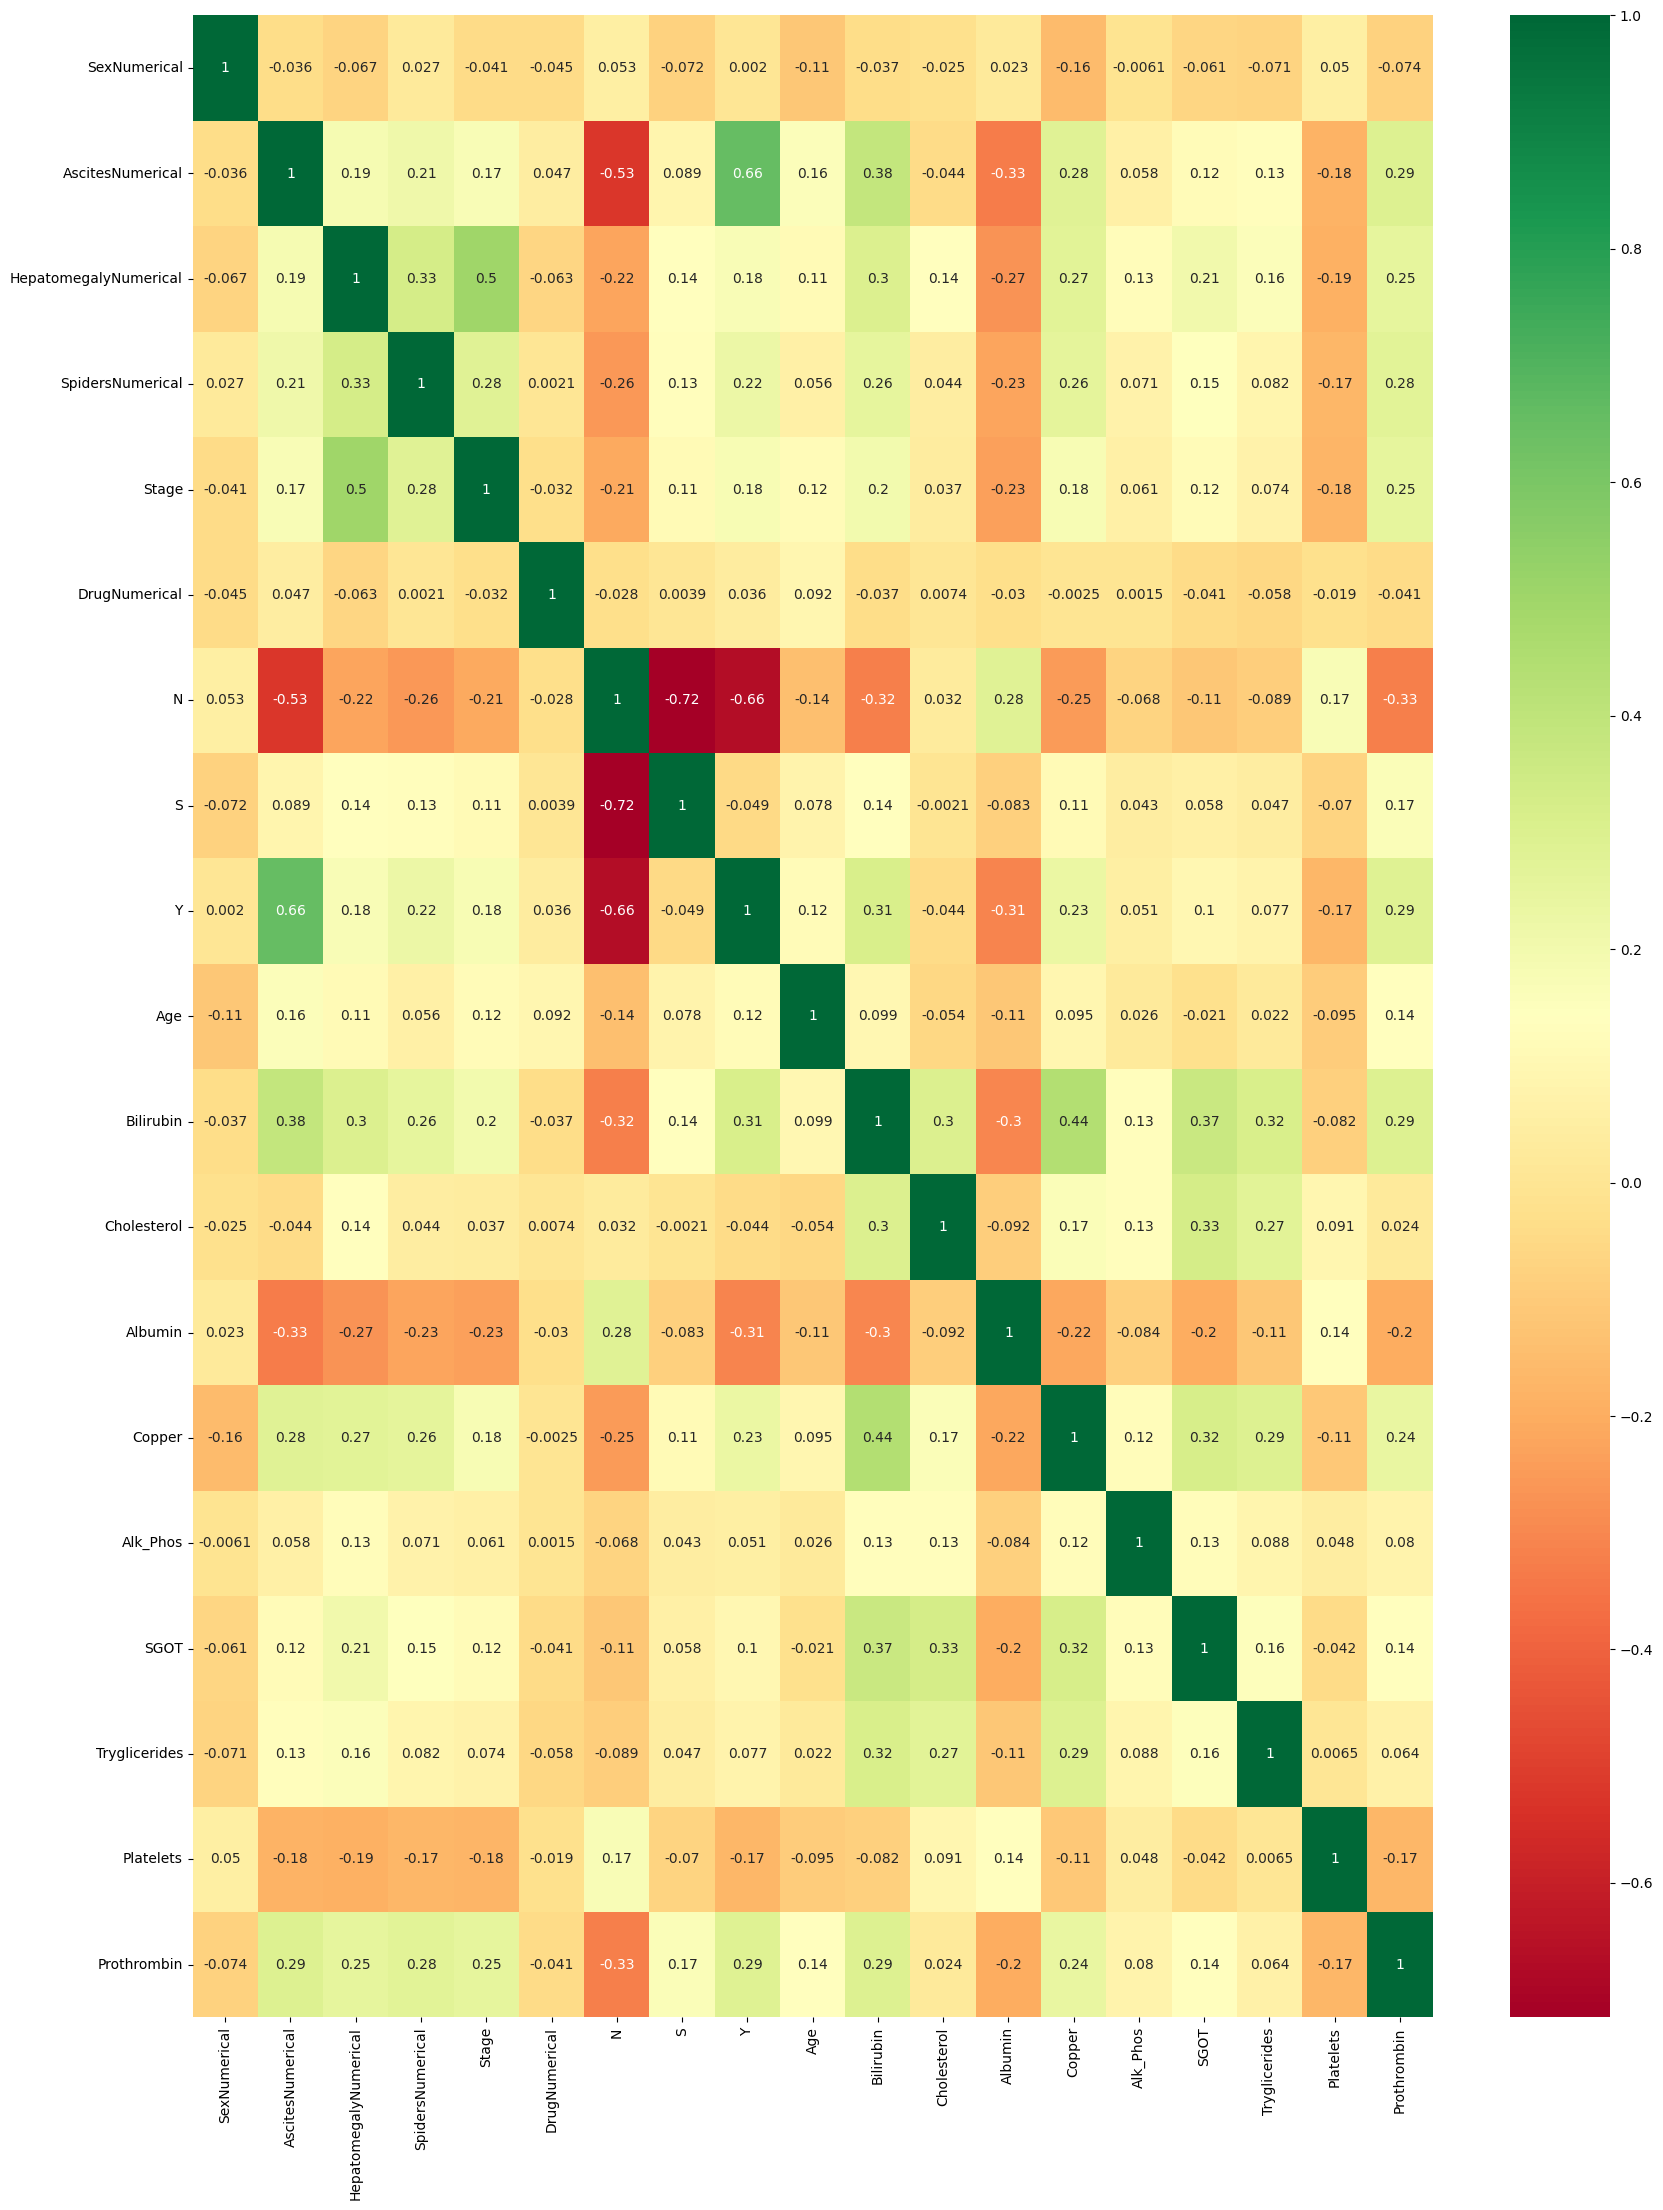

In [90]:
plt.figure(figsize=(20,26))
sns.heatmap(all_train_data.corr(), annot=True, cmap="RdYlGn")

* strong negative correlation between N catagory of edema ascites (-0.53)
* strong positive correlation between Y catagory of edema and ascites (0.66)
* strong positive correlation between stage and hepatomegaly (0.5)

<Figure size 5000x5000 with 0 Axes>

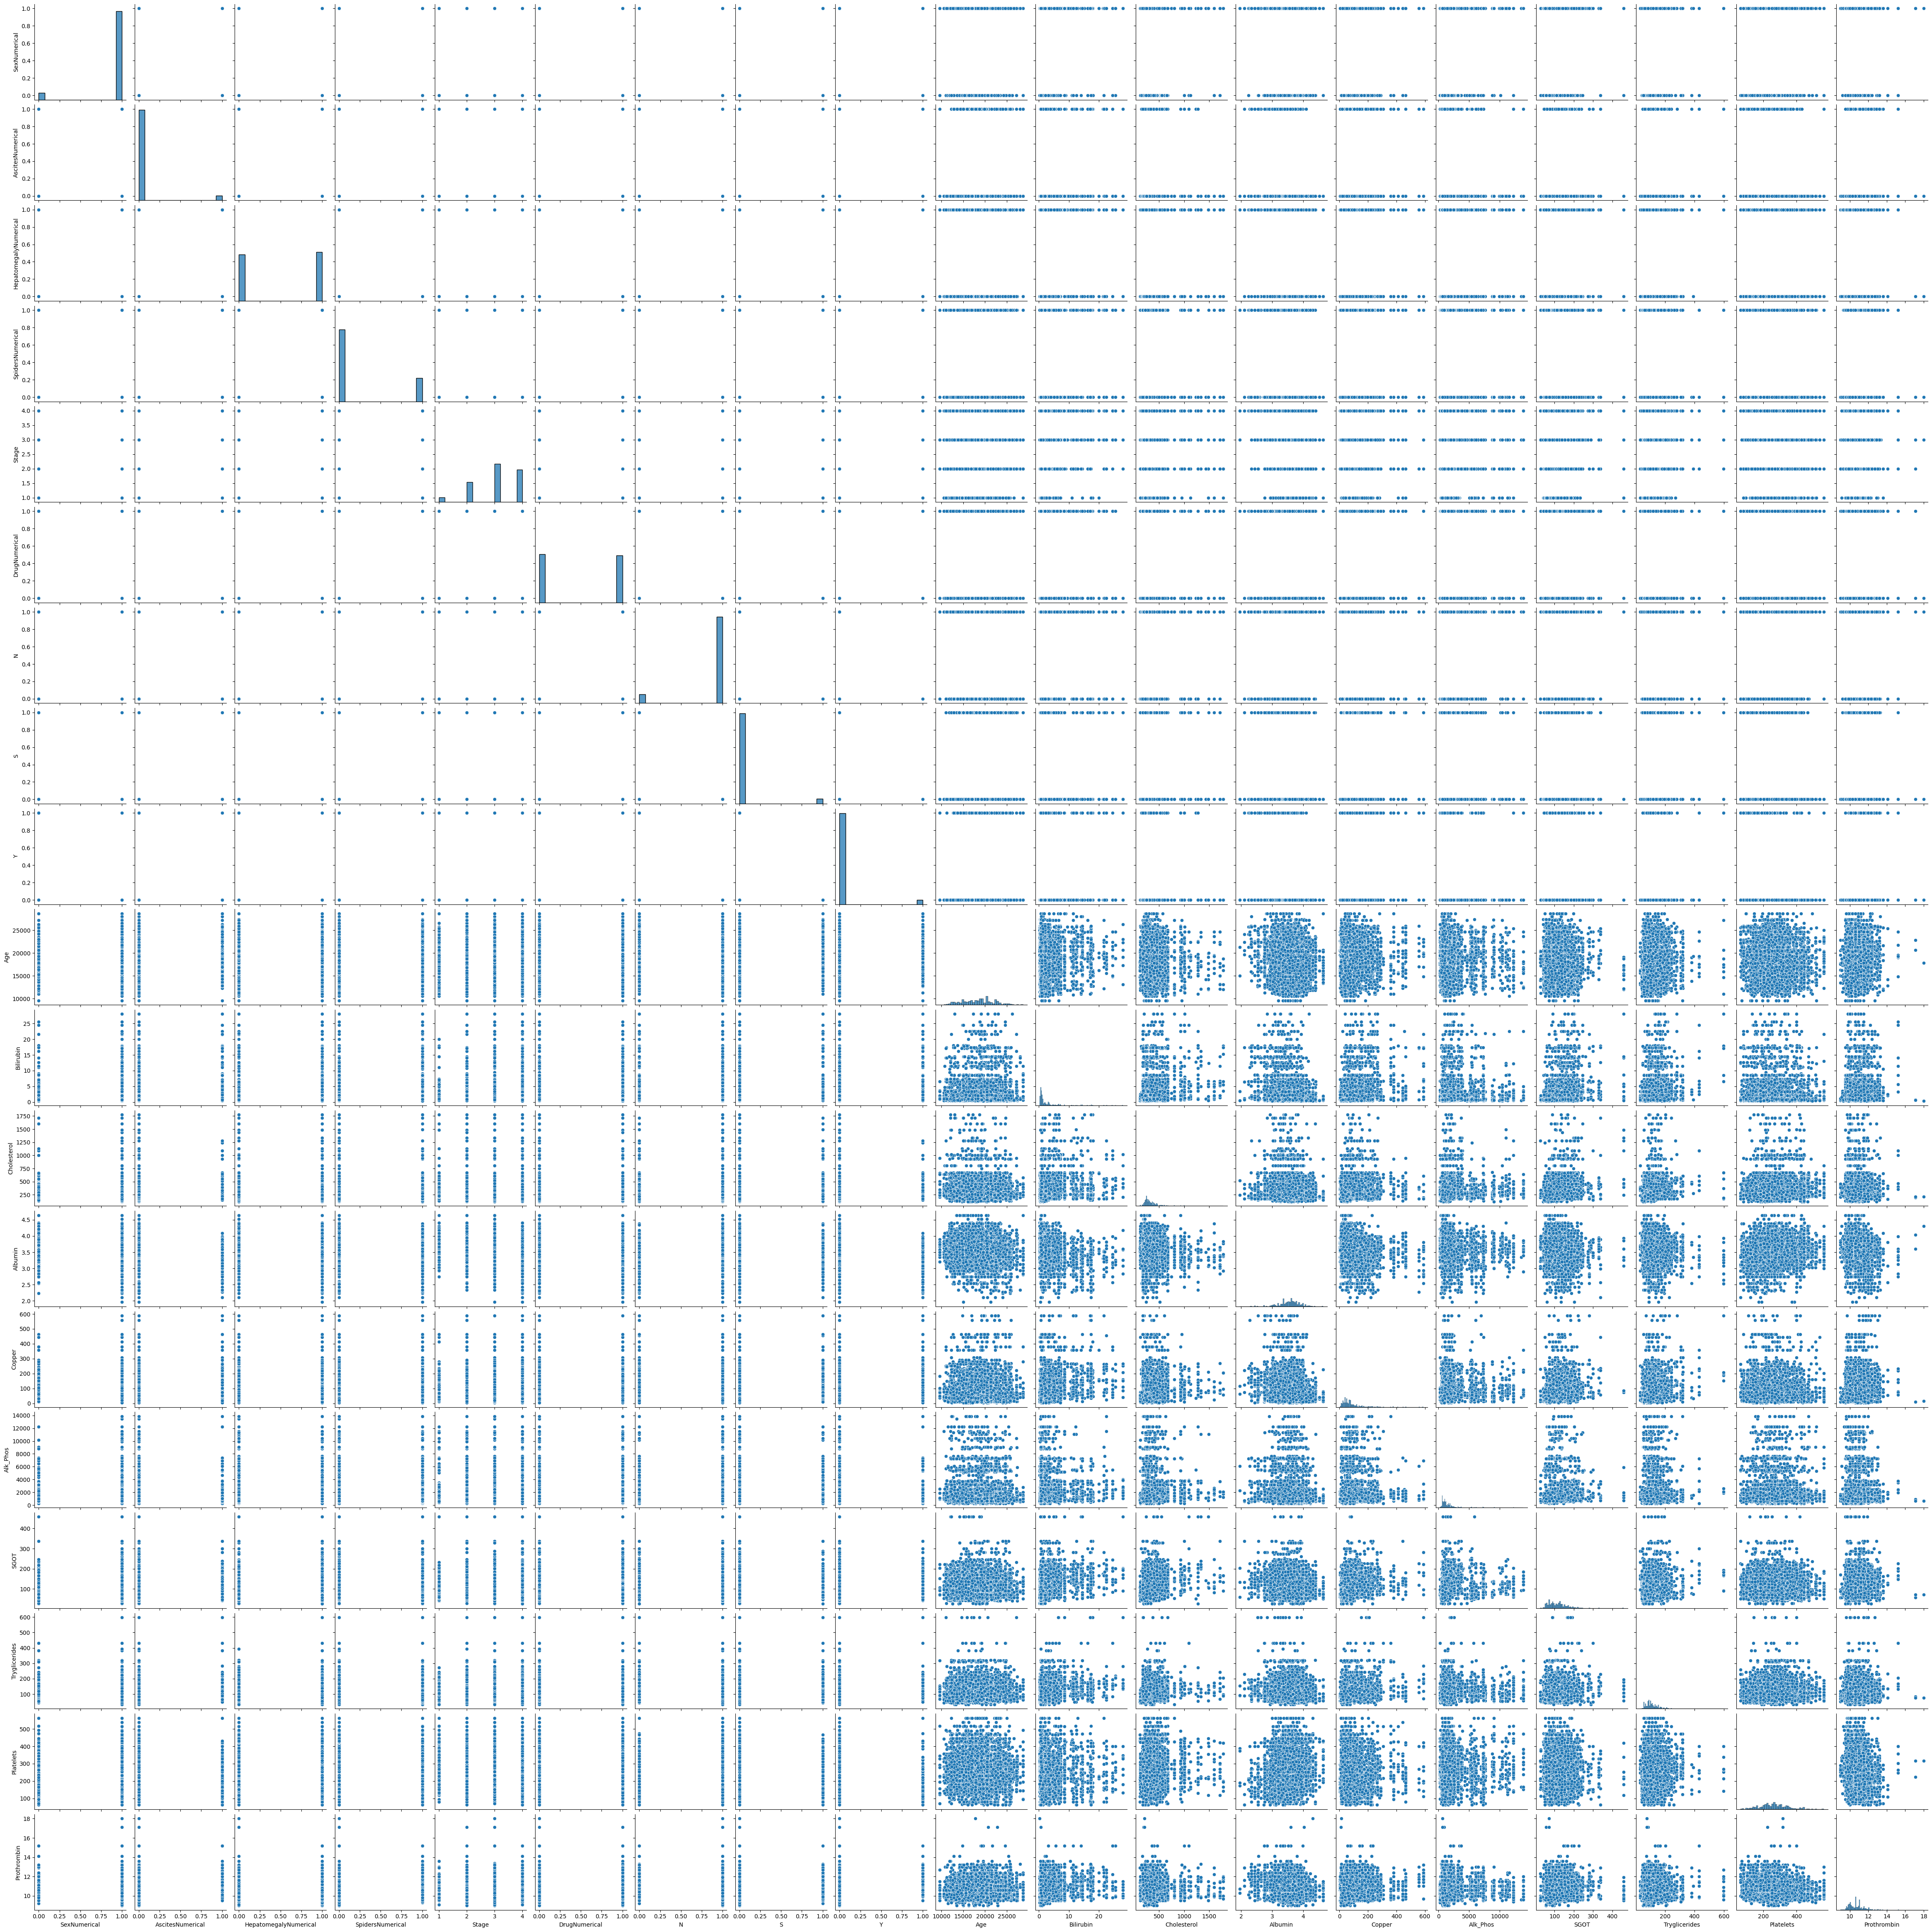

In [92]:
plt.figure(figsize=(50,50))
sns.pairplot(all_train_data)

### no significant non linear relationships were found 